# Hearing and Plotting Sinusoids  

### George Tzanetakis, University of Victoria 

In this notebook we will explore sinusoids as basic abstract building blocks of music. First we look into how to create a sinusoidal signal of a particular duration and frequency with discrete samples at a specified sampling rate. Then we hear and view the resulting signal in different ways and show how simple melodies and chords can be created from individual sinusoidal signals. 

In [2]:
%matplotlib notebook 
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
from matplotlib.widgets import Slider, Button, RadioButtons


Let's create a sinusoid with a frequency of 220Hz at the audio rate of 44100 samples per second. We also generate 5 seconds. The last line of the next cell shows a small player and allows us to hear the generated sound wave. 


In [3]:
srate = 44100      # sampling rate in samples per second 
duration = 5       # duration in seconds 
freq = 440         # frequency in Hz 

t = np.linspace(0,duration,srate*duration)     # time instances of samples 
data =  np.sin(2*np.pi*freq*t);                # samples 

# play the corresponding audio 
ipd.Audio(data,rate=srate)

In [16]:
t1 = np.linspace(0, 5, 100)
print(t1[-5:])

[4.7979798  4.84848485 4.8989899  4.94949495 5.        ]


Now let's look at a plot of our signal. In order to visualize what is happening we will view 0.01 seconds or 10 milliseconds of audio signal. A sinusoidal signal is characterized by three numbers: the amplitude, the frequency, and the phase. The following interactive plot will show the effect of changing these values. 

<IPython.core.display.Javascript object>


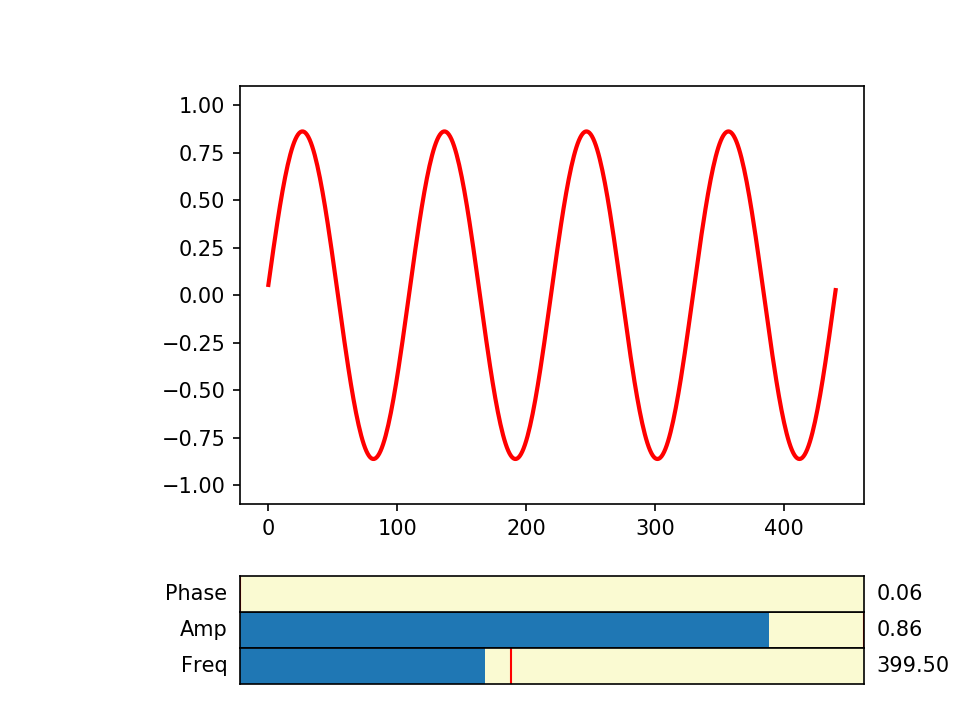

0

In [17]:
# generate a discrete time sinusoid signal with a specified amplitude, frequency, duration, and phase 
def sinusoid(freq=440.0, dur=1.0, srate=44100.0, amp=1.0, phase = 0.0): 
    t = np.linspace(0,dur,int(srate*dur))
    data = amp * np.sin(2*np.pi*freq *t+phase)
    return data

# plot initial signal 
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.30)
l, = plt.plot(sinusoid(freq=440, dur =0.01, amp=1.0), lw=2, color='red')

# create sliders 
axcolor = 'lightgoldenrodyellow'
axamp = plt.axes([0.25, 0.1, 0.65, 0.05], facecolor=axcolor)
axfreq = plt.axes([0.25, 0.05, 0.65, 0.05], facecolor=axcolor)
axphase = plt.axes([0.25, 0.15, 0.65, 0.05], facecolor=axcolor)
samp = Slider(axamp, 'Amp', 0.1, 1.0, valinit=1.0)
sfreq = Slider(axfreq, 'Freq', 10.0, 1000.0, 440)
sphase = Slider(axphase, 'Phase', (2*np.pi) / 100.0, 2 * np.pi, 0)

# the udpate function is called when the slider values changes 
# the plot is redrawn to reflect the new values 
def update(val):
    amp = samp.val
    freq = sfreq.val
    phase = sphase.val
    l.set_ydata(sinusoid(freq=freq,dur = 0.01, amp=amp, phase=phase))
    fig.canvas.draw_idle()
    
# connect the update function with the sliders 
sfreq.on_changed(update)
samp.on_changed(update)
sphase.on_changed(update)

We can abstract the generation of a sine wave of a particular frequency and duration. First two functions for generating discrete sine and cosine signals are defined. By concatenating appropriate sine waves we can generate a simple melody. 

In [19]:
a = [1,2,3]
b = [3,2,1]
c = [4,5,6] 
print(np.hstack([a,b,c,c,c,c,c,c]))

[1 2 3 3 2 1 4 5 6 4 5 6 4 5 6 4 5 6 4 5 6 4 5 6]


In [36]:
# frequencies of three notes (C, D, E) 
c_freq = 523.0   
d_freq = 587.0  
e_freq = 659.0 

# generate sine signals corresponding to each note 
c_data = sinusoid(c_freq, 0.5, amp = 2.0)
d_data = sinusoid(d_freq, 0.5, amp = 2.0)
e_data = sinusoid(e_freq, 0.5, amp = 0.5)

# form a simple melody by concateneting the signal arrays for each note 
data = np.hstack([c_data, d_data, e_data, c_data, c_data, d_data, e_data, c_data])
ipd.Audio(data,rate=srate)

In [35]:
# frequencies of three notes (C, D, E) 
c_freq = 523.0   
 

# generate sine signals corresponding to each note 
c_data = sinusoid(c_freq, 2.0, amp = 1.0, phase=3.0)
print(np.max(c_data))
ipd.Audio(c_data,rate=srate)

0.9999999999262545


Now let's see what happens if we play the sine waves simultanesouly 

In [21]:
data = np.vstack([c_data, d_data, e_data])
ipd.Audio(data,rate=srate)


What if we change a little bit the frequencies 

In [23]:
freq1 = 220.0 
freq2 = 440.0 
freq3 = 660.0 
freq4 = 880.0 

data_f1 = sinusoid(freq1, 0.5, amp=3.0)
data_f2 = sinusoid(freq2, 0.5, amp =3)
data_f3 = sinusoid(freq3, 0.5)
data_f4 = sinusoid(freq4, 0.5)

data = np.hstack([data_f1, data_f2, data_f3, data_f4])
ipd.Audio(data,rate=srate)


Now let's hear them simultaneously 

In [24]:
data = np.vstack([data_f2, data_f3, data_f4])
ipd.Audio(data,rate=srate)